Pontificia Universidad Católica de Chile <br>
Departamento de Ciencia de la Computación <br>
IIC2613 - Inteligencia Artificial
<br>

<center>
    <h1> Redes Neuronales, pesos y back propagation </h1>
    <p>
        Profesora: Jocelyn Dunstan <br>
        Ayudantes: Claudia González e Ignacio Villanueva <br>
        2025-2 <br>    
        Fecha de entrega: Miércoles 05 de Noviembre. <br>
    </p>
    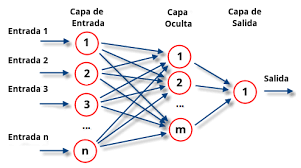
    <br>
</center>

<br>

---

Primero importaremos Tensorflow 2

In [ ]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.19.0


Ahora importaremos el dataset MNIST explicado en la presentación

In [ ]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
y_test[0]

np.uint8(7)

Veamos una ejemplo de como se ven los datos

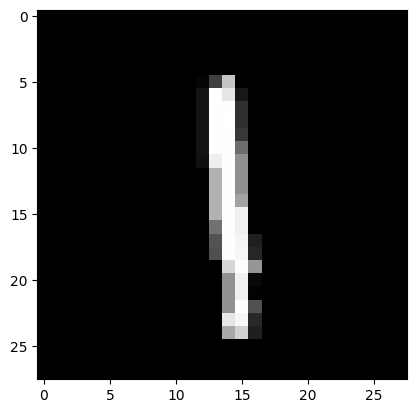

In [ ]:
# Código extraído de https://stackoverflow.com/questions/38308378/show-image-from-mnist-dataset
import matplotlib.pyplot as plt
data_example=x_train[8]
plt.imshow(data_example, cmap="grey")
plt.show()

Tip: Los valores de mnist van del 0 al 255, entonces los normalizaremos para que esten en el intervalo [0,1]. Esto lo haremos porque las redes neuronales funcionan mejor con valores en este intervalo.

In [ ]:
x_train, x_test = x_train / 255.0, x_test / 255.0

##A continuación definiremos nuestra red neuronal.
Pregunta: ¿Cuáles son los hiperparémtros de una red neuronal?

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(64, activation='tanh'),    # capa 1
  tf.keras.layers.Dense(128, activation='relu'),   # capa 2
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Algunas preguntas
*   ¿Qué hace flatten?
*   ¿Qué hace la capa dropout?
*   ¿Por qué el tamaño de la capa de salida es 10?

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),    # Convierte el vector de entrada en una sola dimensión, lo "aplana"
  tf.keras.layers.Dense(64, activation='tanh'),     # Crea una capa de 64 neuronas, con función de activación Tangente hiperbólica
  tf.keras.layers.Dense(128, activation='relu'),    # Crea una capa de 128 neuronas, con función de activación ReLU
  tf.keras.layers.Dropout(0.2),                     # Agrega una capa de dropout, con probabilidad 0.2
  tf.keras.layers.Dense(10)                         # Agregamos una última capa con 10 neuronas --> 1 por cada clase
])

Se verá como algo similar a esto: (pueden generar sus propios dibujos en esta página: https://alexlenail.me/NN-SVG/index.html)

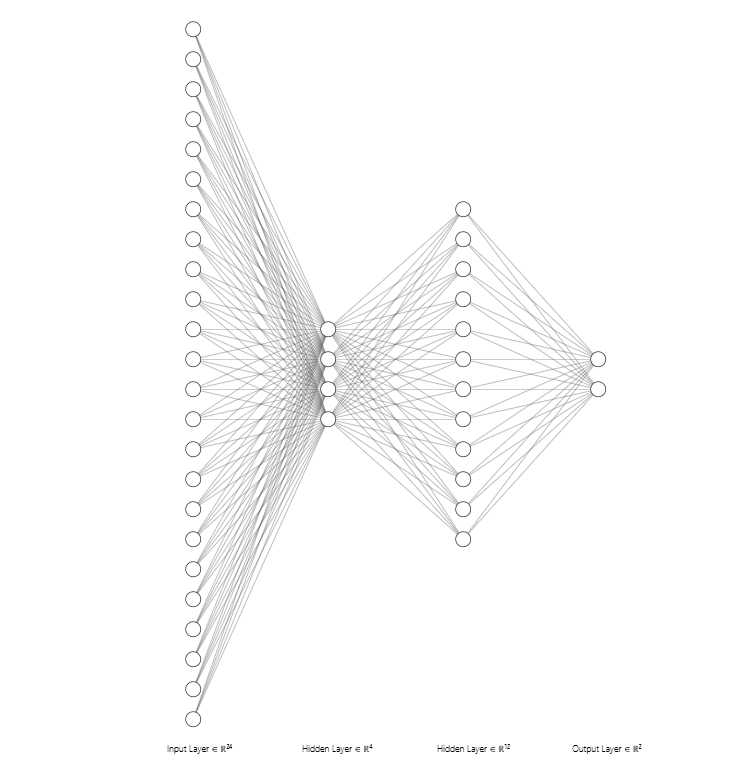

A continuación veamos como funciona el modelo sin entrenamiento:

In [ ]:
predictions = model(x_train[:1]).numpy()
predictions

array([[-0.13462675,  0.06533185,  0.23418047, -0.0897921 ,  0.00979551,
         0.0268373 , -0.10833836, -0.05490287,  0.15203755, -0.06553206]],
      dtype=float32)

Ahora veamos también la función softmax

In [ ]:
resultado_softmax = tf.nn.softmax(predictions).numpy()
resultado_softmax

array([[0.08652797, 0.10568112, 0.12512021, 0.0904957 , 0.09997198,
        0.10169028, 0.08883282, 0.09370875, 0.11525327, 0.09271798]],
      dtype=float32)

In [ ]:
print(f"Suma de predicciones antes de softmax: {predictions.sum()}")
print(f"Suma de predicciones después de softmax: {resultado_softmax.sum()}")

Suma de predicciones antes de softmax: 0.034990519285202026
Suma de predicciones después de softmax: 1.0000001192092896


## Ahora lo entrenaremos

Primero definimos la función de pérdida que usaremos. En este caso utilizaremos la función `Cross Entropy`. Notemos que en este caso no especificamos el uso de softmax, porque `TensorFlow` la incluye "por abajo" en la función de pérdida al darle el argumento `from_logits=True`.

Pregunta: ¿Por qué usamos la función `Cross Entropy`?

In [ ]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

Veamos un ejemplo de como funciona con un dato de entrenamiento:

In [ ]:
loss_fn(y_train[:1], predictions).numpy()

np.float32(2.2858236)

A continuación instanciaremos el entrenamiento del modelo. Notemos que le tenemos que definir el optimizador, la función de pérdida que utilizaremos y la métrica que usaremos para evaluar.

In [ ]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

Lo entrenamos por 5 épocas utilizando el set de train

In [ ]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8500 - loss: 0.4801
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9588 - loss: 0.1350
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9693 - loss: 0.1006
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9765 - loss: 0.0771
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9801 - loss: 0.0667


Lo evaluamos utilizando el set de test.

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test,  y_test, verbose=2)
print(f"Pérdida en set de Test: {test_loss}")
print(f"Precisión (accuracy) en set de Test: {test_accuracy}")

313/313 - 1s - 2ms/step - accuracy: 0.9739 - loss: 0.0943
Pérdida en set de Test: 0.09427312016487122
Precisión (accuracy) en set de Test: 0.9739000201225281


Por último, veamos la matriz de confusión

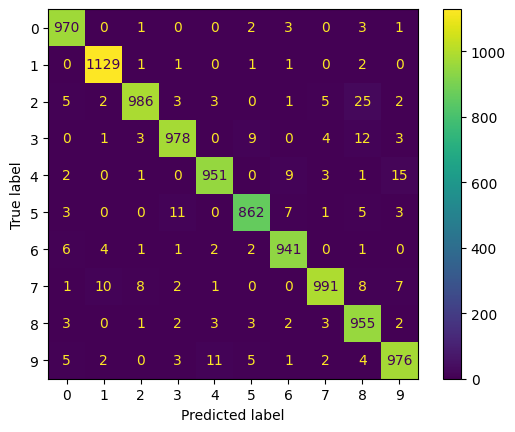

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

y_pred_probs = model(x_test)                # El modelo retorna una probabilidad por cada clase
y_pred = np.argmax(y_pred_probs, axis=1)    # Con esto obtenemos los valores con la mayor probabilidad

conf_matrix = confusion_matrix(y_test, y_pred, labels=[0,1,2,3,4,5,6,7,8,9])
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[0,1,2,3,4,5,6,7,8,9])
disp.plot()
plt.show()

# Bibliografía



*   Imágen de la portada extraída de: https://es.wikipedia.org/wiki/Archivo:RedNeuronalArtificial.png
*   Código inspirado en https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb
* Código para graficar MNIST: https://stackoverflow.com/questions/38308378/show-image-from-mnist-dataset
* Imagen de red neuronal generada en: https://alexlenail.me/NN-SVG/index.html
* Matriz de confusión extraída de: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html
* Funciones de Activación: https://www.geeksforgeeks.org/deep-learning/activation-function-in-tensorflow/
